<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [5]:
import pandas as pd

Load the dataset into a dataframe.


In [6]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [91]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from  matplotlib.ticker import FuncFormatter

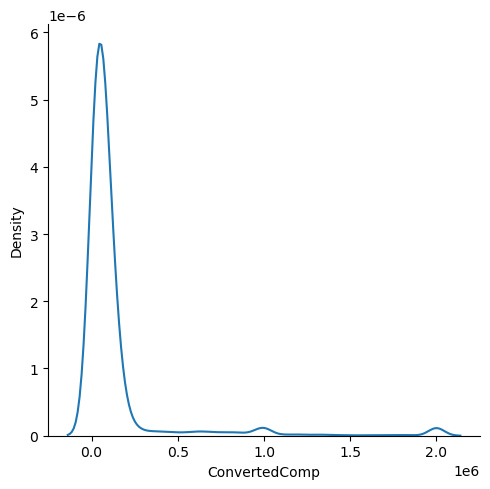

In [8]:
sns.displot(data= df["ConvertedComp"], kind = "kde")
# plt.show

Plot the histogram for the column `ConvertedComp`.


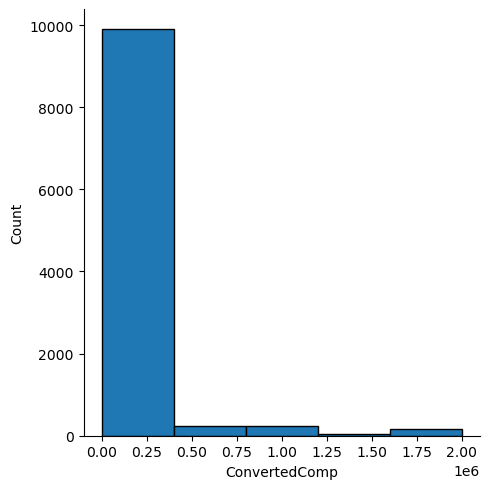

In [17]:
# your code goes here
sns.displot(data= df["ConvertedComp"], kind = "hist", bins = 5, alpha=1)

What is the median of the column `ConvertedComp`?


In [18]:
# your code goes here
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [19]:
# your code goes here
df["Gender"].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [31]:
# your code goes here
# df.groupby('Gender')["ConvertedComp"].median()
df_woman= df[df["Gender"]=="Woman"]
# df_woman_new = df_woman["ConvertedComp"].dropna(axis = 0)
df_woman["ConvertedComp"].median()


57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


<AxesSubplot:>

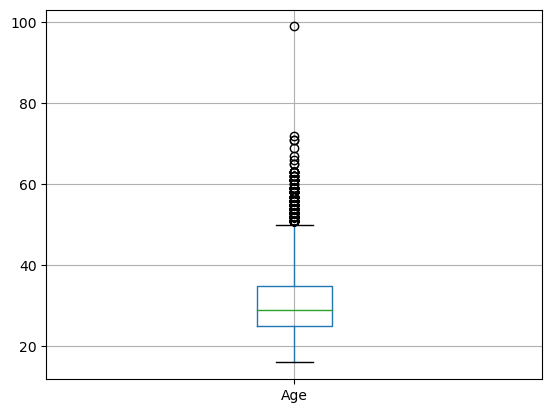

In [52]:
# your code goes here
# data = df["Age"]
# plt.boxplot(data)
# df["Age"].head()
# plt.show
# sns.boxplot(y=df["Age"])  #in seaborn
df.boxplot(column = "Age")  #by dataframe 
plt.boxplot()   #using matplotlib

Plot a histogram of the column `Age`.


(array([2.094e+03, 5.337e+03, 2.557e+03, 8.420e+02, 2.250e+02, 4.900e+01,
        6.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 24.3, 32.6, 40.9, 49.2, 57.5, 65.8, 74.1, 82.4, 90.7, 99. ]),
 <BarContainer object of 10 artists>)

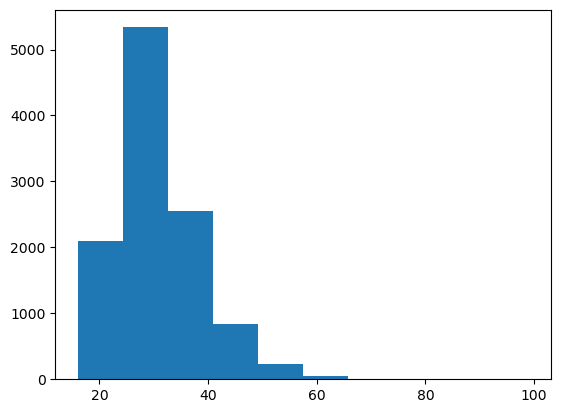

In [41]:
# your code goes here
# sns.displot(df["Age"])
plt.hist(df["Age"])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


[Text(0.5, 1.0, 'Outliers In Converted Comp')]

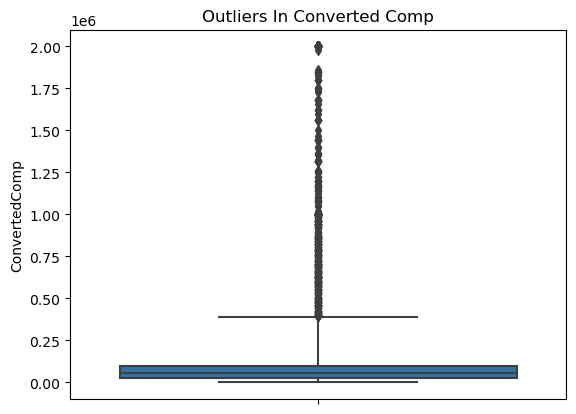

In [93]:
# your code goes here
# df_cv = pd.DataFrame(data=df['ConvertedComp'])
# df_cv.plot(kind='box', figsize=(8,6))  #using Dataframe method
# plt.show()


# using seaborn library

box_plot = sns.boxplot(y= df['ConvertedComp'], whis=4)
box_plot.set( title="Outliers In Converted Comp")



# using matplotlib
# data = df["ConvertedComp"]
# fig, ax = plt.subplots()
# ax.boxplot(data)
# plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [69]:
# your code goes here
q1 = df["ConvertedComp"].quantile(0.25)
q3 = df["ConvertedComp"].quantile(0.75)
IQR = q3 - q1
# print("Inter Quartile range is {}".format(IQR))         string formatting
print(f"Inter Quartile range is {IQR}")

Inter Quartile range is 73132.0


Find out the upper and lower bounds.


In [74]:
# your code goes here
upper_bound = q3 + 1.5*IQR
lower_bound = q1 - 1.5*IQR

print(f"upper and lower bound are {upper_bound} and {lower_bound}")

upper and lower bound are 209698.0 and -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [80]:
# your code goes here
outliers_below = (df["ConvertedComp"].lt(lower_bound)).sum()   #lt means less than and it compare all dataframe values if those are less than specific (given)value 
                                                                    # that is lower_bound here
outliers_above = (df["ConvertedComp"].gt(upper_bound)).sum()    #gt means greater than and it compare all dataframe values if those are greater than specific (given)value 
                                                                 #that is upper_bound here
    
print(f"No of outliers incolumn ConvertedComp below are {outliers_below} and above are {outliers_above} ")

No of outliers incolumn ConvertedComp below are 0 and above are 879 


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [86]:
# your code goes here
#  as in previous step , we calculates no of outliers in lower and upper bound. To remove these outliers we will use"trimming" 
#  to get new dataframe with values those are lower than upper bound limit.
df[df["ConvertedComp"]> upper_bound]    # display the dataframe of values (outliers) greater than upper bound

new_df = df[df["ConvertedComp"]< upper_bound]   #create new dataframe that does not include outliers
new_df.shape




(9703, 85)

<AxesSubplot:xlabel='ConvertedComp'>

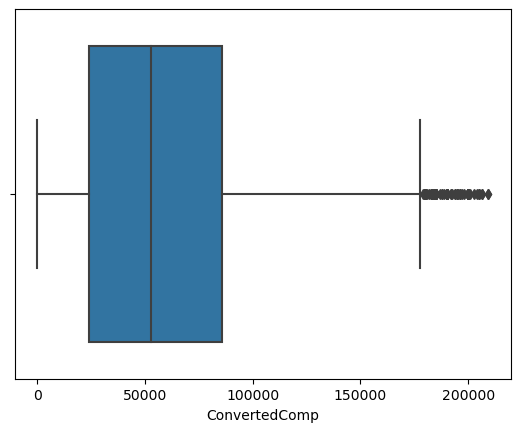

In [95]:
# Now create the plot for new dataframe after removing outliers
# plt.boxplot(new_df["ConvertedComp"])   #using matplotlib
sns.boxplot(x = new_df["ConvertedComp"])   #using seaborn

In [133]:
# now we will do capping(set upper limit and lower limit values after comapring all data frame values against these )

new_df_cap =new_df.copy()
new_df_cap["ConvertedComp"] = np.where(new_df_cap["ConvertedComp"]>upper_bound,upper_bound, 
                                      np.where(new_df_cap["ConvertedComp"]<lower_bound, 
                                       lower_bound, new_df_cap["ConvertedComp"]))
new_df_cap["ConvertedComp"]

0         61000.0
1         95179.0
2         90000.0
4         65277.0
5         31140.0
           ...   
11392      9600.0
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
Name: ConvertedComp, Length: 9703, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x202f8971fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x202f89719d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x202f8971160>],
 'medians': [<matplotlib.lines.Line2D at 0x202f8a82fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x202f8a82280>],
 'means': []}

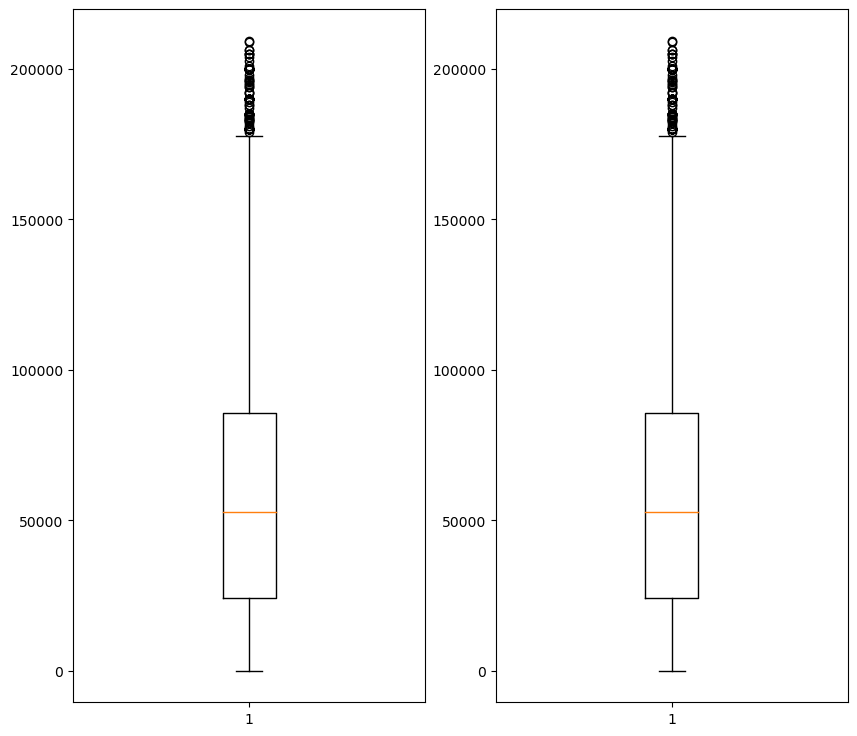

In [149]:
# Now plot new datframe after capping  and compare with previous one 

fig = plt.figure(figsize=(10, 9))
new_df_trim = fig.add_subplot(121)
new_df_trim.boxplot(new_df["ConvertedComp"])
new_df_cap1 = fig.add_subplot(122)
new_df_cap1.boxplot(new_df_cap["ConvertedComp"])



## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [145]:
# your code goes here
pd.DataFrame(df.corr()["Age"])   #first find corr for all columns i.e df.corr() and then only get results or "Age" column

,Age
Respondent,0.004041
CompTotal,0.006970
ConvertedComp,0.105386
WorkWeekHrs,0.036518
CodeRevHrs,-0.020469
Age,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
